<a href="https://colab.research.google.com/github/Venkatarameshredd/30DaysOfWebDevelopment/blob/main/Linear_Discriminant_Analysis_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 0.11228223 -0.66143204  0.28532388  0.1667341 ]
 [ 0.90229674 -0.19183064  1.01966344  1.08815939]]
Eigen Values: [3.21919292e+01 2.85391043e-01 6.50437694e-15 1.88408463e-15]
[[-1.78184932  0.10475073]
 [-1.57560938 -0.27429294]
 [-1.65542996 -0.09253433]
 [-1.50587922 -0.2338358 ]
 [-1.7974336   0.17938292]]


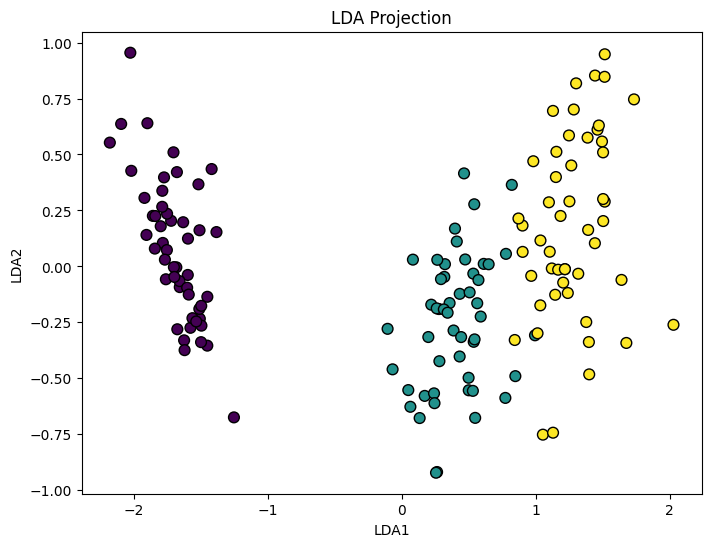

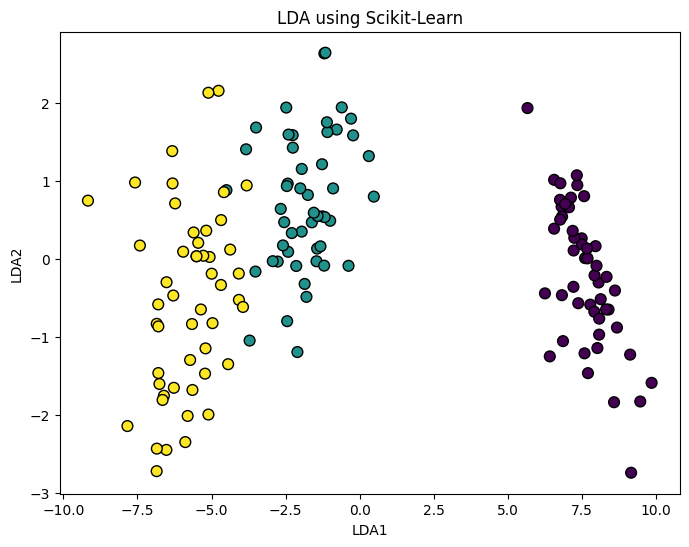

Accuracy: 1.0


In [10]:
#import libraries
import pandas as pd
from sklearn.datasets import load_iris

#step1:Load the data
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
print(df.head())

#step2:Preprocesssing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df.drop('target',axis=1))
y=df['target']

#compute mean vector for each class
import numpy as np
mean_vectors=[]
for label in np.unique(y):
  mean_vectors.append(np.mean(x[y==label],axis=0))

mean_vectors=np.array(mean_vectors)
print(mean_vectors)
#compute scatter matrices
s_w=np.zeros((x.shape[1],x.shape[1]))
for label in np.unique(y):
  class_scatter=np.cov(x[y==label],rowvar=False)*(x[y==label].shape[0]-1)
  s_w += class_scatter

overall_mean=np.mean(x,axis=0)
s_b=np.zeros((x.shape[1],x.shape[1]))

for label,mean_vec in zip(np.unique(y),mean_vectors):
  n=x[y==label].shape[0]
  mean_diff=(mean_vec-overall_mean).reshape(-1,1)
  s_b+=n*(mean_diff).dot(mean_diff.T)

eigvals,eigvecs=np.linalg.eig(np.linalg.inv(s_w).dot(s_b))

#sort the eigen values and eigen vectors
sorted_indices=np.argsort(eigvals)[::-1]
eigvals_sorted=eigvals[sorted_indices]
eigvecs_sorted=eigvecs[:,sorted_indices]
print("Eigen Values:",eigvals_sorted)


#step5:select top eigenvectors
k=2
top_eigvecs=eigvecs_sorted[:,:k]
x_lda=x.dot(top_eigvecs)
print(x_lda[:5])

#step6:Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_lda[:,0],x_lda[:,1],c=y,cmap="viridis",edgecolor='k',s=60)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title("LDA Projection")
plt.show()



#implementing LDA using Scikit learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
x_lda_sklearn=lda.fit_transform(x,y)

plt.figure(figsize=(8,6))
plt.scatter(x_lda_sklearn[:,0],x_lda_sklearn[:,1],c=y,cmap="viridis",edgecolor='k',s=60)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title("LDA using Scikit-Learn")
plt.show()

#Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Train LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train, y_train)
# Make predictions
y_pred = lda_model.predict(x_test)
# Evaluate accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

